In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.version)

from sklearn import neighbors, datasets

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 19:19:16) 
[GCC 7.2.0]


In [8]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target


In [10]:
#Splitting dataset into training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_y, 
                                test_size = 0.25, random_state = 0)


In [13]:
print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 112
Test size    : 38


In [21]:
#Sometesting of the sample
clf  = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Print results for first 20 test data points:")
print("Predicted labels: ", y_pred[20:40])
print("Ground truth    : ", y_test[20:40])

from sklearn.metrics import accuracy_score
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Print results for first 20 test data points:
Predicted labels:  [2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0 2]
Ground truth    :  [2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0 1]
Accuracy of 1NN: 97.37 %


In [31]:
#Fitting the classifer into training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

#Predict the test set result
y_pred = classifier.predict(X_test)

print("Accuracy of 10NN with minkowski:", round(100*accuracy_score(y_test, y_pred), 2), "%")

Accuracy of 10NN with minkowski: 97.37 %


In [35]:
#Fitting the classifer into training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', p=2)
classifier.fit(X_train, y_train)

#Predict the test set result
y_pred = classifier.predict(X_test)

print("Accuracy of 10NN with uniform:", round(100*accuracy_score(y_test, y_pred), 2), "%")

Accuracy of 10NN with uniform: 97.37 %


In [36]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [53]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

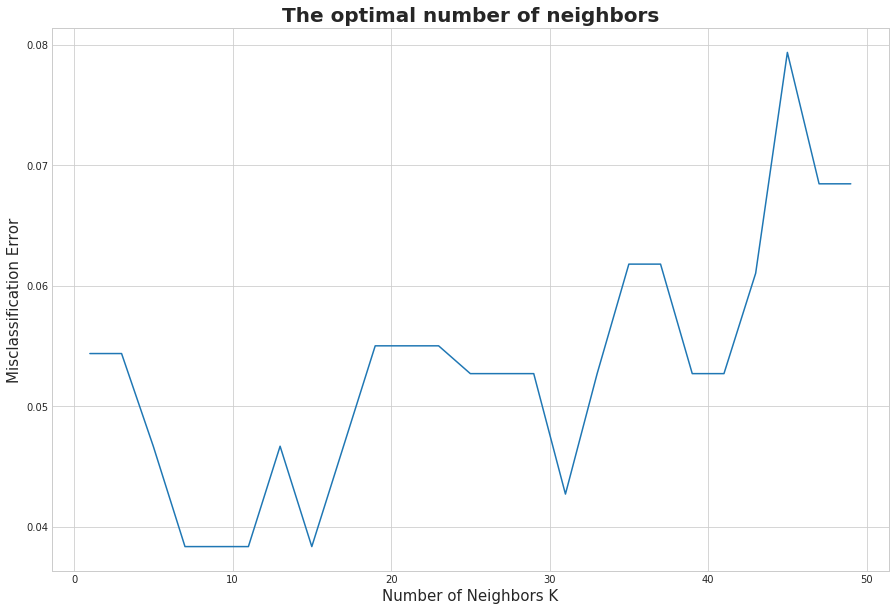

In [57]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()
